In [1]:
%load_ext autoreload
%autoreload 2

## import general packages
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#%matplotlib nbagg


import os, sys

## add root directory to path, to allow for imports 
root_dir = os.path.dirname(os.path.abspath(os.getcwd()))
if not root_dir in sys.path: sys.path.append(root_dir)


## import darkMatter specific packages
from darkMatter import darkMatter
from utils.plots import *
from utils.parameters import create_population_values, set_options

tau_I
tau_I
3 100
3 100


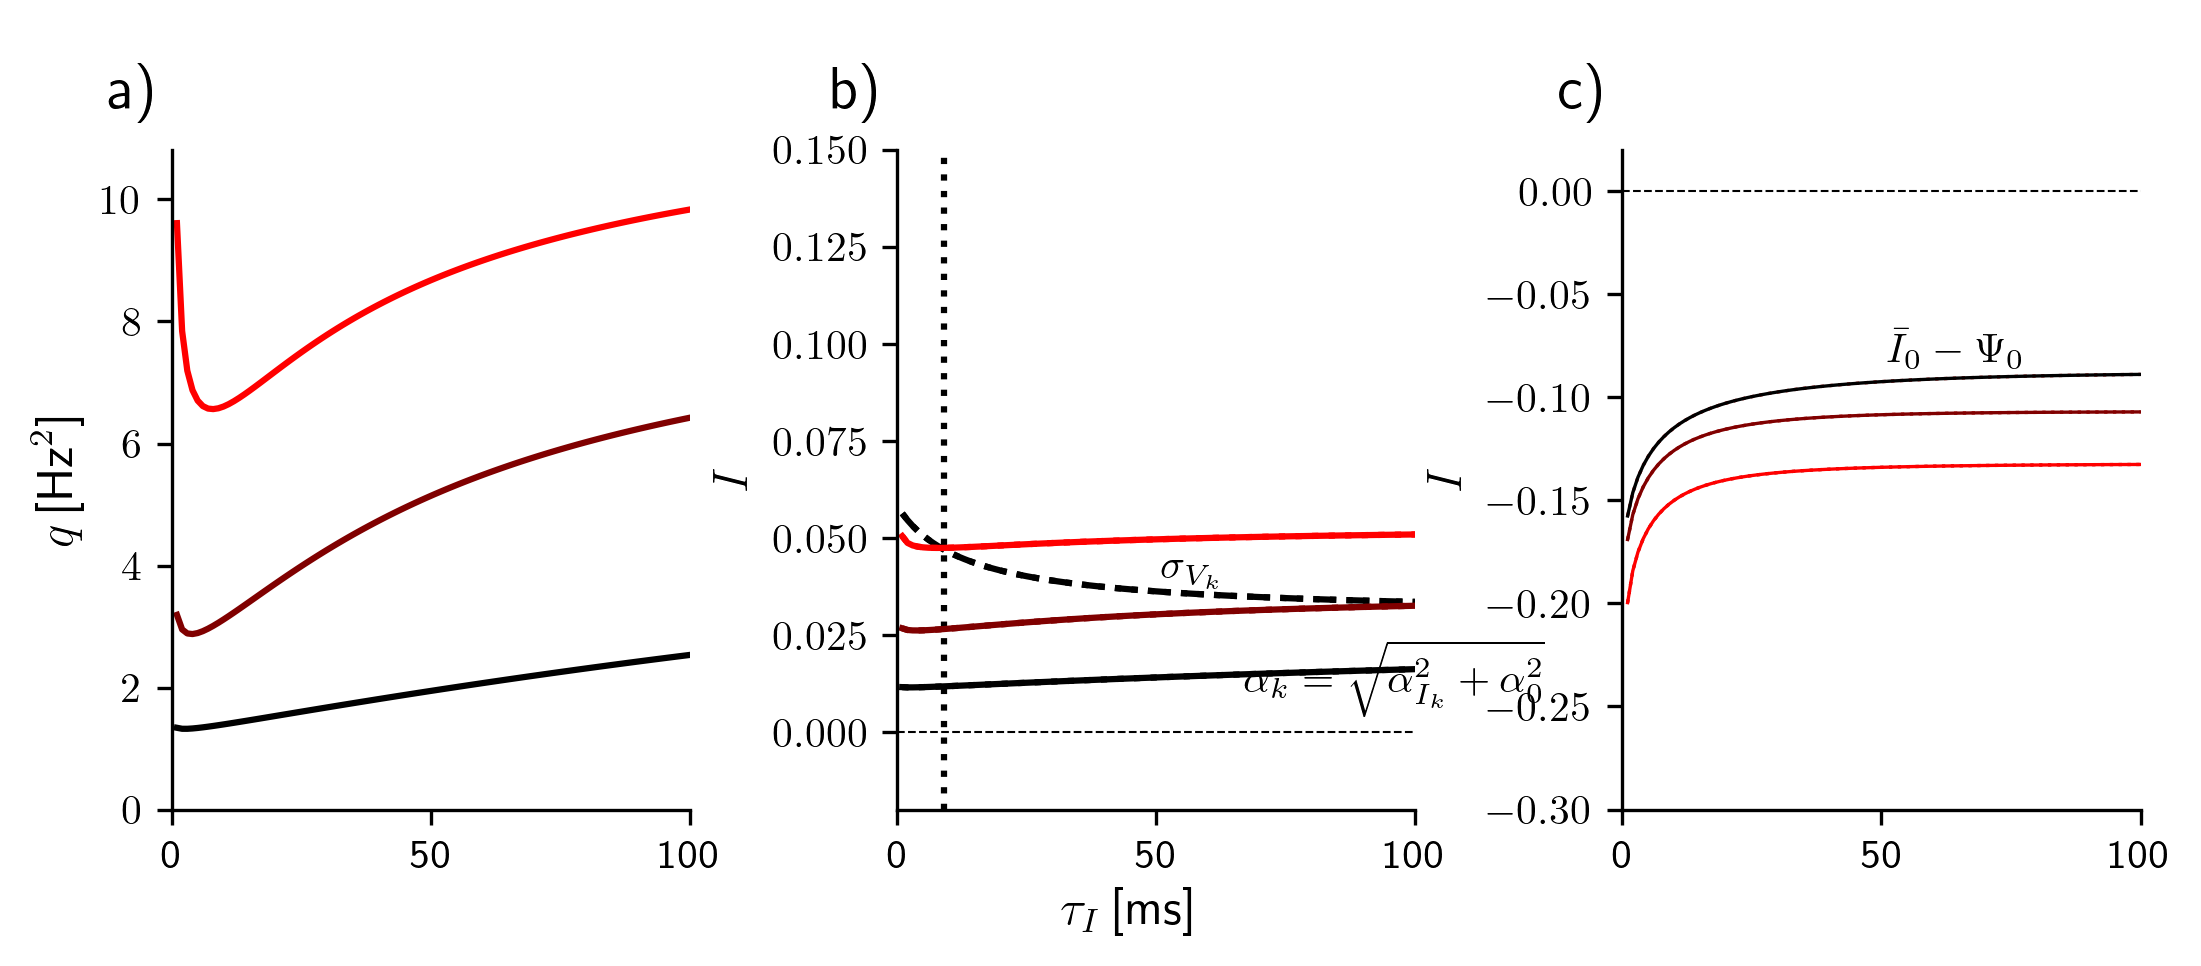

In [18]:
options = set_options(L=1,nI=1,nE=1)
options['simulation'] = {
    'tau_I': [0.,0.1],
    'alpha_0': [0,0.02,0.04],
    'sim_prim': [0,0,0],
    'sim_sec': [0,-1,0]
}
options['mode_stats'] = 1

x_key = [o for o in list(options['simulation']) if not o.startswith('sim')][0]

res = darkMatter(steps=100,options=options,rerun=True,compile=False,logging=3)


## prepare plots
set_plot_params()
plt_para = {
    'title': {
        'descr': False,
        'x_offset': -0.2
        },
    'x': {
        'key': x_key, 
        'lim': 0.1
        },
}
print(x_key)
fig, ax = plt.subplots(1,3,figsize=(7.5,4),dpi=300)

big_ax = plt.axes([0.1,0.2,0.8,0.7])
big_ax.set_facecolor('none')
big_ax.tick_params(labelcolor='none',top='off',bottom='off',left='off',right='off')
big_ax.spines[['top','right','bottom','left']].set_visible(False)
plt.setp(big_ax,xticks=[],yticks=[])
big_ax.set_xlabel(get_displayString(x_key))

plot_q(ax[0],res,plt_para,order=0)
#ax[0].legend(prop={'size':10},bbox_to_anchor=(0.4,0.5),loc='lower left',handlelength=1)
    
plot_currents(ax[1],res,plt_para,plot_options=['var'],order=0)
plot_currents(ax[2],res,plt_para,plot_options=['I'],order=0)

for i in range(3):
    set_title(ax[i],i+1,'',(-0.075,0),10)
    plt.setp(ax[i],xlabel='',xticks=np.linspace(0,0.1,3),xticklabels=['%d'%x for x in np.linspace(0,100,3)])

plt.subplots_adjust(left=0.075, bottom=0.25, right=0.95, top=0.8, wspace=0.4, hspace=0.6)
for j in range(3):
    ax[j].spines[['right','top']].set_visible(False)
    ax[j].yaxis.set_ticks_position('left')
    ax[j].xaxis.set_ticks_position('bottom')

save=False
if save:
    sv_name = './figures/timescale.%s' % (file_format)
    plt.savefig(sv_name,format=file_format,dpi=300)
    print('Figure saved as "%s"' % sv_name)